# 주성분 분석

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-01-13 06:16:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-01-13 06:16:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-01-13 06:16:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [7]:
print(pca.components_.shape)

# 50개의 주성분, 10000개의 특성

(50, 10000)


In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

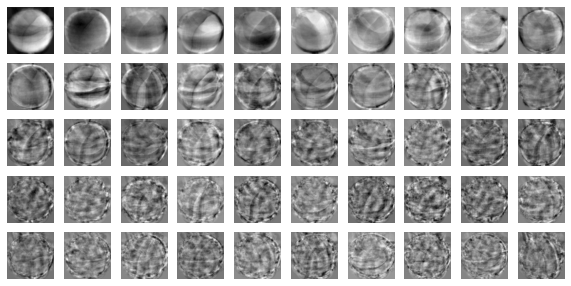

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
# 주성분을 찾았으므로 원본데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

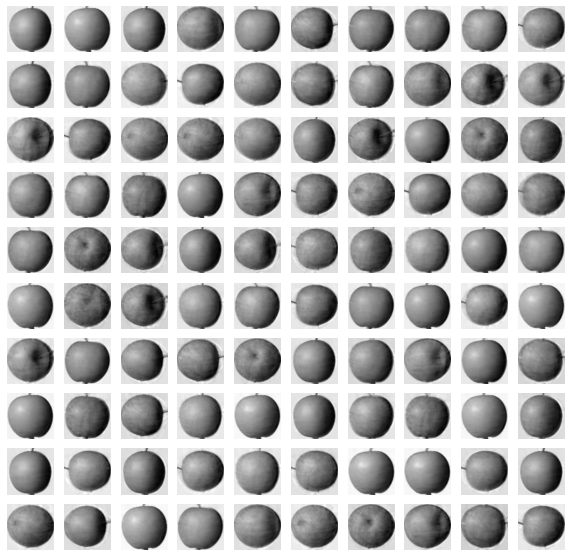

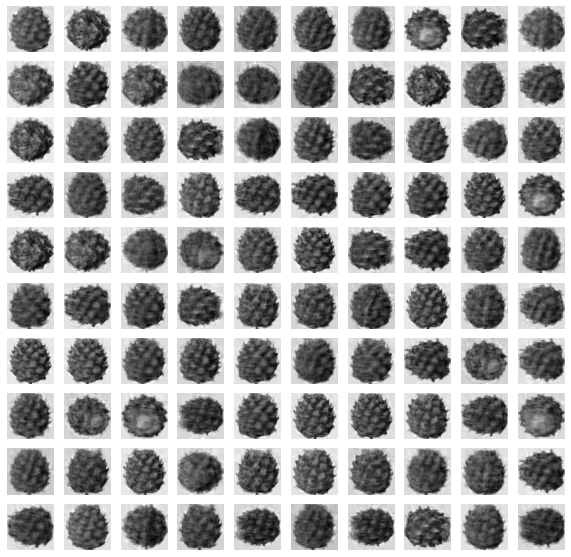

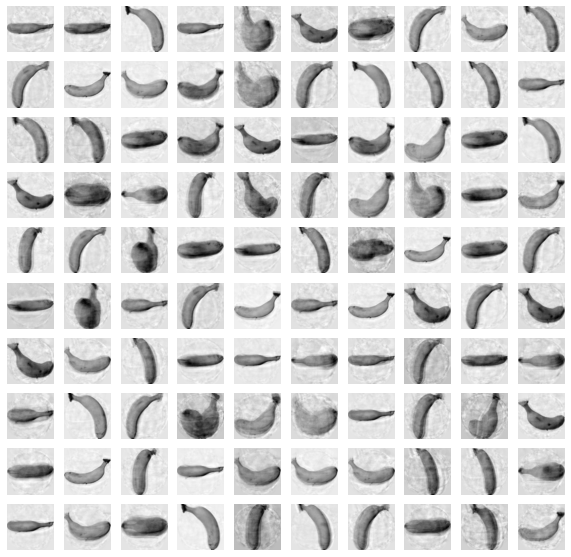

In [11]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [13]:
print(np.sum(pca.explained_variance_ratio_))

# 92프로가 넘는 분산을 유지. 앞에서 50개의 특성에서 원본데이터를 복원했을때 원본
# 이미지의 품질이 높았던 이유가 이것이다.

0.9215470774474019


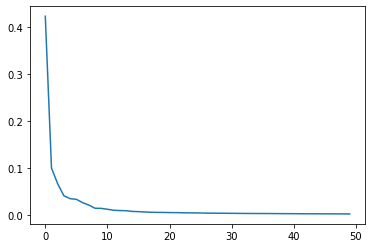

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 처음 19개의 주성분이 대부분의 분산을 표현하고 있다. 그 다음부터는 각 주성분이 설명하고 있는 분산은
# 비교적 작다.

## 다른 알고리즘과 함께 사용하기

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
# 지도학습 모델을 사용하려면 타깃값이 있어야한다. 사과0 파인애플1 바나나2로 지정
target = np.array([0]*100 + [1]*100 + [2]*100)

In [19]:
# 먼저 원본데이터인 fruits_2d를 사용해보죠
# 로지스틱 회귀모델에서 성능을 가늠해보기위해서 cross_validate()로 교차검증을 수행해보겠다.
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3688635349273681


In [21]:
# pca로 축소한 fruits_pca를 사용했을때
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 50개의 특성만 사용했음에도 정확도가 100%이고 훈련시간은 0.03초로 매우 짧아졌다. 
# 즉, PCA로 훈련 데이터의 차원을 축소하면 저장공간 뿐만아니라 머신러닝 모델의 훈련 속도도 
# 매우 높일 수 있다.

1.0
0.02688140869140625


In [24]:
# 분산의 50%에 달하는 주성분을 찾아보겠다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
print(pca.n_components_)

2


In [26]:
# 주성분이 2개이므로 변환된 데이터의 크기는 300,2가 될것이다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성을 사용했을 뿐인데 99%의 정확도를 달성했다.


0.9933333333333334
0.0434354305267334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [30]:
# 이번에는 차원축소된 데이터를 이용해 k평균 알고리즘으로 클러스터를 찾아보겠다.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


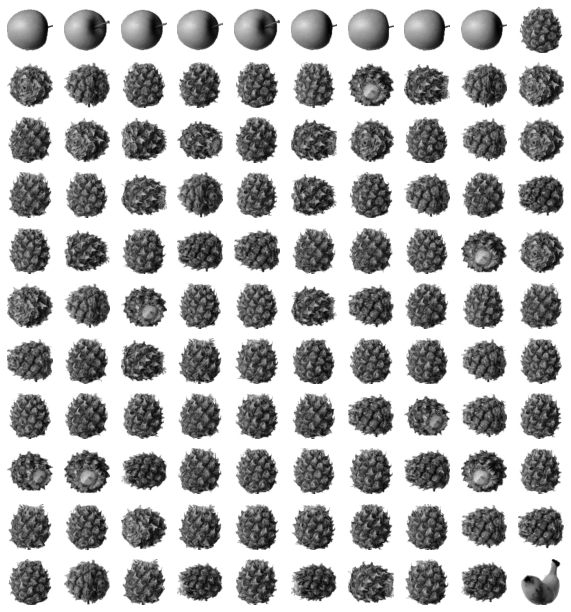

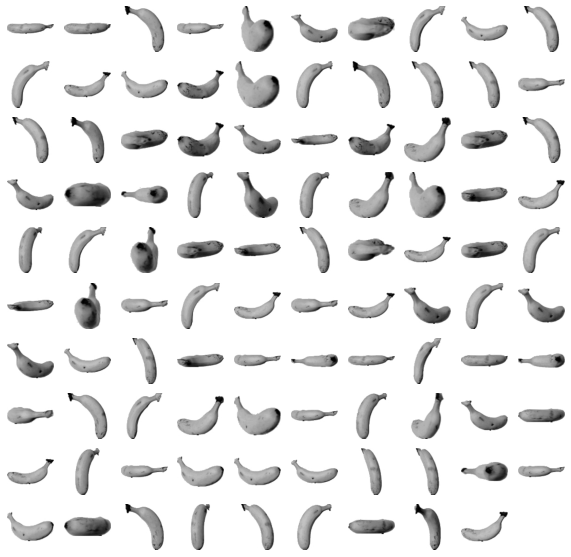

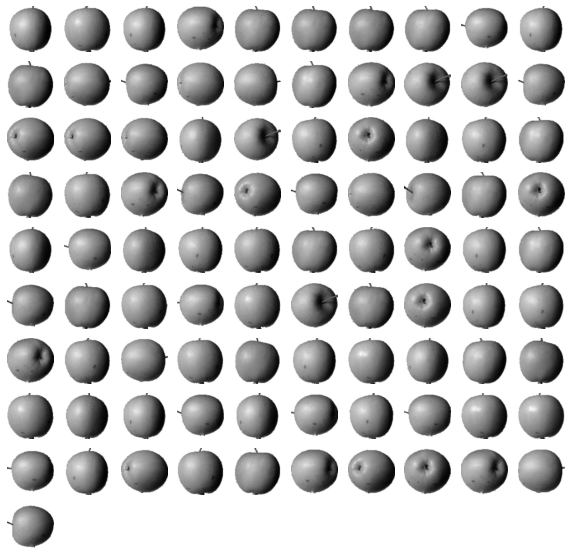

In [31]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

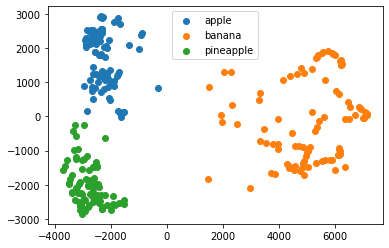

In [32]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()